In [37]:
import pandas as pd
import numpy as np
import os

## Import Netflix Data set
### Source : created by Shivam Bansal at https://www.kaggle.com/shivamb/netflix-shows

In [38]:
pwd = os.getcwd() 
filepath = pwd + "/Practice datasets/netflix_titles.csv"
netflix_df = pd.read_csv(filepath)
netflix_df

# # Function for reading CSV files.
# def read_csv_data(dataset_location, dataset_name):
#     pwd = os.getcwd()
#     filepath = pwd + dataset_location
#     dataset_name = pd.read_csv(filepath)

#     return dataset_name

# # function call
# read_csv_data(dataset_location = "/Practice datasets/netflix_titles.csv", dataset_name = netflix_df)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


## Explore the Dataset

In [39]:
# return all columns within the dataset.
list(netflix_df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [40]:
# descriptive sataistics on all numeriacal columns within the dataset
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


## Identifying unique values

In [41]:
# see number of unique values in a column
col = netflix_df[["show_id",	"type",	"title", "director", "cast", "country",	"date_added", "release_year", "rating",	"duration",	"listed_in","description"]]
col.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [42]:
# see unique values in a column

netflix_df["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [43]:
list(netflix_df["type"].unique())

['TV Show', 'Movie']

## Data Types

In [44]:
data_types = dict(netflix_df.dtypes)
print(data_types)

{'show_id': dtype('O'), 'type': dtype('O'), 'title': dtype('O'), 'director': dtype('O'), 'cast': dtype('O'), 'country': dtype('O'), 'date_added': dtype('O'), 'release_year': dtype('int64'), 'rating': dtype('O'), 'duration': dtype('O'), 'listed_in': dtype('O'), 'description': dtype('O')}


## Filtering the Dataset

In [45]:
# return movies only found in France
def filter_by_name(column, filter_val):
    return netflix_df[netflix_df[column] == filter_val]

# function filter via a column name
filter_by_name(column="country", filter_val="France")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
49,s50,Movie,10 jours en or,Nicolas Brossette,"Franck Dubosc, Claude Rich, Marie Kremer, Math...",France,"July 1, 2017",2012,TV-14,97 min,"Comedies, Dramas, International Movies",When a carefree bachelor is unexpectedly left ...
77,s78,Movie,2 Alone in Paris,"Ramzy Bedia, Éric Judor","Ramzy Bedia, Éric Judor, Benoît Magimel, Krist...",France,"June 1, 2020",2008,TV-MA,97 min,"Comedies, International Movies",A bumbling Paris policeman is doggedly determi...
203,s204,Movie,A Mighty Team,Thomas Sorriaux,"Gérard Depardieu, Chantal Lauby, Medi Sadoun, ...",France,"October 15, 2016",2016,TV-MA,97 min,"Comedies, International Movies, Sports Movies","When a fit of anger leads to a serious injury,..."
248,s249,TV Show,A Very Secret Service,NaN,"Hugo Becker, Wilfred Benaïche, Christophe Kour...",France,"July 30, 2018",2018,TV-MA,2 Seasons,"International TV Shows, TV Comedies","At the height of the Cold War in 1960, André M..."
303,s304,TV Show,Ad Vitam,NaN,"Yvan Attal, Garance Marillier, Niels Schneider...",France,"November 1, 2019",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",In a future where regeneration technology lets...
...,...,...,...,...,...,...,...,...,...,...,...,...
7498,s7499,Movie,We Are One,Stéphane de Freitas,NaN,France,"July 14, 2020",2020,TV-MA,86 min,"Documentaries, International Movies, Music & M...",Activists around the world fight injustice and...
7517,s7518,Movie,Wedding Unplanned,Reem Kherici,"Reem Kherici, Nicolas Duvauchelle, Julia Piato...",France,"October 19, 2017",2017,TV-MA,94 min,"Comedies, International Movies, Romantic Movies",Mathias's girlfriend finds a business card for...
7536,s7537,Movie,West Coast,Benjamin Weill,"Devi Couzigou, Mathis Crusson, Victor Le Blond...",France,"October 28, 2016",2016,TV-MA,81 min,"Comedies, Dramas, International Movies",Four small-town French teens who style themsel...
7605,s7606,TV Show,Who Killed Little Gregory?,NaN,NaN,France,"November 20, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","When their 4-year-old son is murdered, a young..."


In [46]:
# filtering using multiple conditions. Shows only movies from France with TV rating TV-14
netflix_df[(netflix_df["country"] == "France") & (netflix_df["rating"] == "TV-14")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
49,s50,Movie,10 jours en or,Nicolas Brossette,"Franck Dubosc, Claude Rich, Marie Kremer, Math...",France,"July 1, 2017",2012,TV-14,97 min,"Comedies, Dramas, International Movies",When a carefree bachelor is unexpectedly left ...
309,s310,Movie,Addicted to Life,Thierry Donard,"Antoine Bizet, Jesse Richman, Karsten Gefle, W...",France,"June 12, 2020",2014,TV-14,91 min,"Action & Adventure, Documentaries, Internation...","Chasing extreme challenges, athletic daredevil..."
512,s513,Movie,Anelka: Misunderstood,Franck Nataf,Nicolas Anelka,France,"August 5, 2020",2020,TV-14,95 min,"Documentaries, International Movies, Sports Mo...","Inscrutable, incomparable or both? Famed Frenc..."
978,s979,Movie,Blind Date,Clovis Cornillac,"Mélanie Bernier, Clovis Cornillac, Lilou Fogli...",France,"October 15, 2016",2015,TV-14,91 min,"Comedies, International Movies, Music & Musicals",A passionate pianist and a soulful puzzle make...
1230,s1231,Movie,Casablancas: The Man Who Loved Women,Hubert Woroniecki,NaN,France,"January 13, 2017",2016,TV-14,82 min,"Documentaries, International Movies",The rise and smash success of Elite modeling a...
1814,s1815,Movie,Don't Crack Under Pressure III,Thierry Donard,"Temarii Buillard, Davide Carrera, Jesse Richma...",France,"June 12, 2020",2017,TV-14,94 min,"Action & Adventure, Documentaries, Internation...","Through deserts, above mountains and deep into..."
1982,s1983,Movie,Elles étaient en guerre (1914-1918),"Fabien Beziat, Hugues Nancy",Nathalie Baye,France,"December 31, 2017",2014,TV-14,93 min,"Documentaries, International Movies",Trace the overlapping journeys of exceptional ...
2760,s2761,Movie,Hitler's Steel Beast,Daniel Ablin,NaN,France,"November 1, 2017",2017,TV-14,54 min,"Documentaries, International Movies",Trace the history of Hitler's armored private ...
3224,s3225,Movie,Journey to Greenland,Sébastien Betbeder,"Thomas Blanchard, Thomas Scimeca, François Cha...",France,"January 29, 2017",2016,TV-14,99 min,"Comedies, International Movies",When they flee Paris for a remote village in G...
3378,s3379,Movie,Kill Hitler! The Luck of the Devil,Frédéric Tonolli,Jean-Baptiste Marcenac,France,"May 1, 2019",2015,TV-14,53 min,"Documentaries, International Movies","From politicians to officers, many attempted t..."


## Splitting Columns
Sometimes you can encounter a DataFrame column with data that we need to split on some delimiter. Lets say that we wish to know
the amount of years from a realease a movie has been added. The "data_added" & "release_year" columns would be perfect for this.
However note "data_added" column, we need to split it so so that the year is in it's own column.

### let do that :

In [47]:
netflix_df[["date_added_part1", "date_added_yr"]] = netflix_df["date_added"].str.split(", ", expand=True)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_part1,date_added_yr
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August 14,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December 23,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December 20,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November 16,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January 1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,October 19,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March 2,2019
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",September 25,2020
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,October 31,2020


# Dealing with NA Values

In [48]:
# replaces NA value in Cast column with the string "no cast"
netflix_df["cast"].fillna(value="no cast", inplace=True)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_part1,date_added_yr
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August 14,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December 23,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December 20,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November 16,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January 1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,October 19,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March 2,2019
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",September 25,2020
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,October 31,2020


## Exploring Rating Column

In [49]:
list(netflix_df['rating'].unique())

['TV-MA',
 'R',
 'PG-13',
 'TV-14',
 'TV-PG',
 'NR',
 'TV-G',
 'TV-Y',
 nan,
 'TV-Y7',
 'PG',
 'G',
 'NC-17',
 'TV-Y7-FV',
 'UR']

<AxesSubplot:title={'center':'Ratings Count'}>

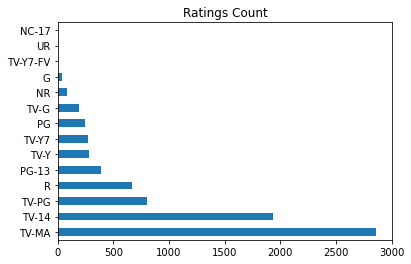

In [50]:
netflix_df['rating'].value_counts().plot(kind='barh', title='Ratings Count',)


In [51]:
# function used to filter rating column
def filter_rating(category):
    if 'TV-14' in category:
        return '14 & up'
    elif 'TV-MA' in category:
        return 'Mature audience'
    else:
        return 'Other'

In [52]:

netflix_df['Rating_Type'] = netflix_df['rating'].astype(str).apply(filter_rating) #create derived column, containg results from applying 'filter_rating' function on rating column.
netflix_df[['rating', 'Rating_Type']][:5] # show fist 5 rows of the two columns.

,rating,Rating_Type
0,TV-MA,Mature audience
1,TV-MA,Mature audience
2,R,Other
3,PG-13,Other
4,PG-13,Other


<AxesSubplot:title={'center':'Mature audience vs 14 Up'}, ylabel='ratings'>

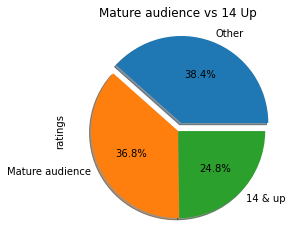

In [53]:
netflix_df['Rating_Type'].value_counts().plot(kind='pie', label = 'ratings', title="Mature audience vs 14 Up", legend=False, \
                                                autopct='%1.1f%%', explode=(0.1, 0, 0), \
                                                shadow=True, startangle=0)

In [56]:
# filter the netflix dataframe for Mature audience & 14 Up only (TV-MA & TV-14)
netflix_df[(netflix_df['Rating_Type'] == '14 & up') | (netflix_df['Rating_Type'] == 'Mature audience')][:8]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_part1,date_added_yr,Rating_Type
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August 14,2020,Mature audience
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December 23,2016,Mature audience
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,July 1,2017,Mature audience
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June 1,2020,Mature audience
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",April 1,2019,14 & up
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,December 15,2017,Mature audience
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,October 20,2017,Mature audience
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",November 30,2018,Mature audience


# Group by, Aggregation & Sorting Values

In [55]:
#Group By & Sort
netflix_movies_by_country = netflix_df.groupby("country")["show_id"].count().reset_index().sort_values(by="show_id", ascending=False)

netflix_movies_by_country

,country,show_id
549,United States,2555
229,India,923
462,United Kingdom,397
291,Japan,226
394,South Korea,183
...,...,...
252,"Indonesia, South Korea, Singapore",1
253,"Indonesia, United Kingdom",1
254,"Indonesia, United States",1
255,"Iran, France",1
